> Convolutional neural networks (CNNs) emerged from the study of the brain’s visual cortex, and they have been used in image recognition since the 1980s

# The Architecture of the Visual Cortex

David H. Hubel and Torsten Wiesel performed a series of experiments on cats in [1958](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1357023/pdf/jphysiol01301-0020.pdf) and [1959](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1363130/pdf/jphysiol01298-0128.pdf) [and a few years later on monkeys](https://physoc.onlinelibrary.wiley.com/doi/pdf/10.1113/jphysiol.1968.sp008455), giving crucial insights into the structure of the visual cortex

Many neurons in the visual cortex have a small **local receptive field,** meaning they **react only to visual stimuli located in a limited region of the visual field** (see Figure 14-1, in which the local receptive fields of five neurons are represented by dashed circles)

The receptive fields of different neurons may overlap, and together they tile the whole visual field

Moreover, some neurons react only to images of horizontal lines. **Some neurons have larger receptive fields,** and they react to more complex patterns that are combinations of the **lower-level patterns**

**The higher level neurons are based on the outputs of neighboring lower-level neurons** (in Figure 14-1, notice that each neuron is connected only to a few neurons from the previous layer)

This powerful architecture is able to detect all sorts of complex patterns in any area of the visual field



<p align='center'>
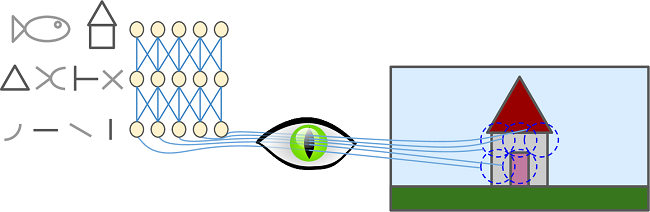
</p>

Figure 14-1. Biological neurons in the visual cortex respond to specific patterns in small regions of the visual field called receptive fields; as the visual signal makes its way through consecutive brain modules, neurons respond to more complex patterns in larger receptive fields

These studies of the visual cortex inspired the [neocognitron](https://www.cs.princeton.edu/courses/archive/spr08/cos598B/Readings/Fukushima1980.pdf), introduced in 1980, which gradually evolved into what we now call convolutional neural networks

An important milestone was a [1998 paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) by Yann LeCun et al. that introduced the famous LeNet-5 architecture, widely used by banks to recognize handwritten check numbers

# Convolutional Layers

The most important building block of a CNN is the convolutional layer: **neurons in the first convolutional layer are not connected to every single pixel in the input image, but only to pixels in their receptive fields** (see Figure 14-2)

In turn, **each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer**

This architecture allows the network to **concentrate on small low-level features in the first hidden layer, then assemble them into larger higher-level features in the next hidden layer,** and so on

<p align='center'>
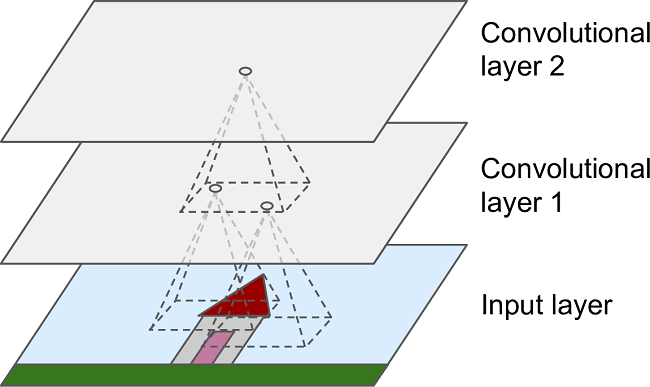
</p>
Figure 14-2. CNN layers with rectangular local receptive fields

A neuron located in row $i$, column $j$ of a given layer is connected to the outputs of the neurons in the previous layer located in rows $i$ to $i + f_h - 1$, columns $j$ to $j + f_w - 1$, where $f_h$ and $f_w$ are the height and width of the receptive field (see Figure 14-3)

**In order for a layer to have the same height and width as the previous layer, it is common to add zeros around the inputs, as shown in the diagram.** This is called **zero padding**

<p align='center'>
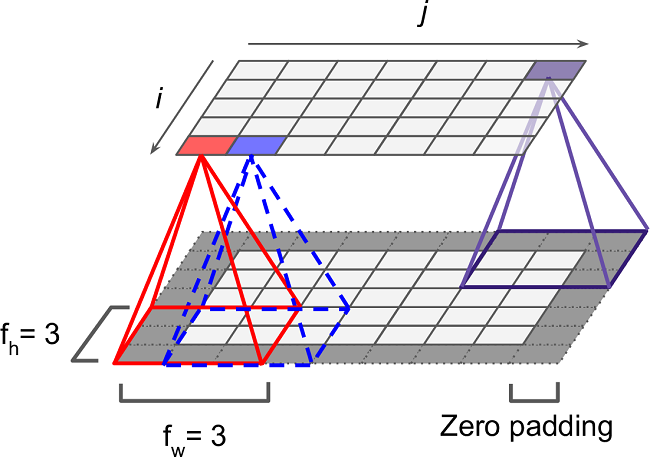
</p>
Figure 14-3. Connections between layers and zero padding

It is also **possible to connect a large input layer to a much smaller layer by spacing out the receptive fields,** as shown in Figure 14-4. This dramatically **reduces** the model’s **computational complexity**

The **shift** from one receptive field to the next is called the **stride**

In the diagram, a $5 \times 7$ input layer (plus zero padding) is connected to a $3 \times 4$ layer, using $3 \times 3$ receptive fields and a stride of 2

A neuron located in row $i$, column $j$ in the upper layer is connected to the outputs of the neurons in the previous layer located in rows $i \times s_h$ to $i \times s_h + f_h - 1$, columns $j \times s_w$ to $j \times s_w + f_w - 1$, where $s_h$ and $s_w$ are the vertical and horizontal strides

<p align='center'>
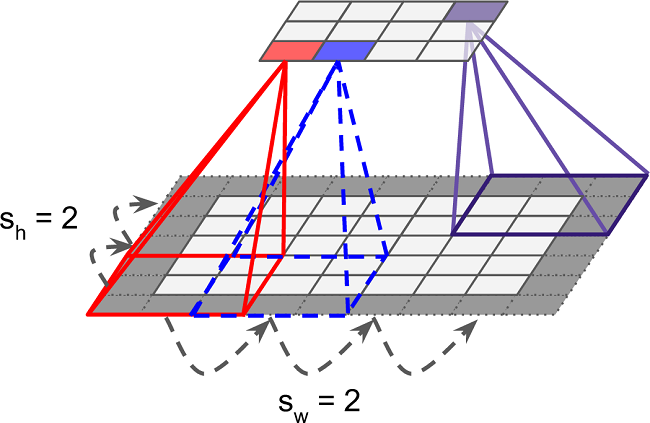
</p>
Figure 14-4. Reducing dimensionality using a stride of 2

## Filters

**A neuron’s weights can be represented as a small image the size of the receptive field**. For example, Figure 14-5 shows two possible sets of weights, called **filters (or convolution kernels)**

The first one is represented as a black square with a vertical white line in the middle (it is a $7 \times 7$ matrix full of 0s except for the central column, which is full of 1s);

**Neurons using these weights will ignore everything in their receptive field except for the central vertical line** (since all inputs will get multiplied by 0, except for the ones located in the central vertical line)

The second filter is a black square with a horizontal white line in the middle. Once again, neurons using these weights will ignore everything in their receptive field except for the central horizontal line

Now if all neurons in a layer use the same vertical line filter (and the same bias term), and you feed the network the input image shown in Figure 14-5 (the bottom image), the layer will output the top-left image. **Notice that the vertical white lines get enhanced while the rest gets blurred**

Similarly, the upper-right image is what you get if all neurons use the same **horizontal line filter;** notice that the **horizontal white lines get enhanced while the rest is blurred out**

Thus, **a layer full of neurons using the same filter outputs a feature map,** which **highlights the areas in an image that activate the filter the most**

Of course, you do not have to define the filters manually: instead, **during training the convolutional layer will automatically learn the most useful filters for its task,** and the layers above will **learn to combine them into more complex patterns**






<p align='center'>
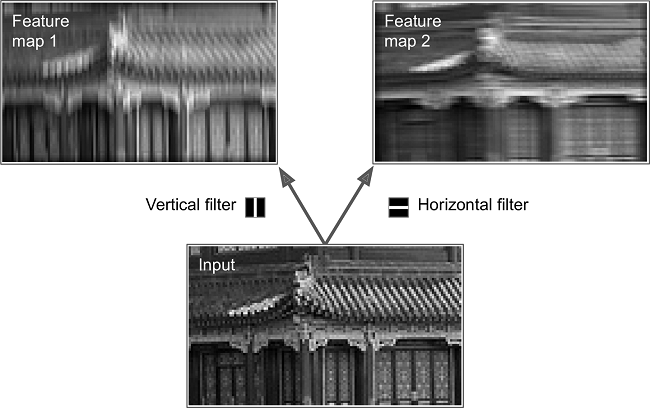
</p>
Figure 14-5. Applying two different filters to get two feature maps

## Stacking Multiple Feature Maps

In reality a convolutional layer has multiple filters (you decide how many) and outputs one feature map per filter, so it is **more accurately represented in 3D** (see Figure 14-6)

**It has one neuron per pixel in each feature map, and all neurons within a given feature map share the same parameters **(i.e., the same weights and bias term)

Neurons in different feature maps use different parameters. A neuron’s receptive field is the same as described earlier, but it extends across all the previous layers’ feature maps

In short, **a convolutional layer simultaneously applies multiple trainable filters to its inputs,** making it capable of detecting multiple features anywhere in its inputs

**Input images are also composed of multiple sublayers: one per color channel.** There are typically three: red, green, and blue (RGB). **Grayscale images have just one channel,** but some images may have much more—for example, satellite images that capture extra light frequencies (such as infrared)

<p align='center'>
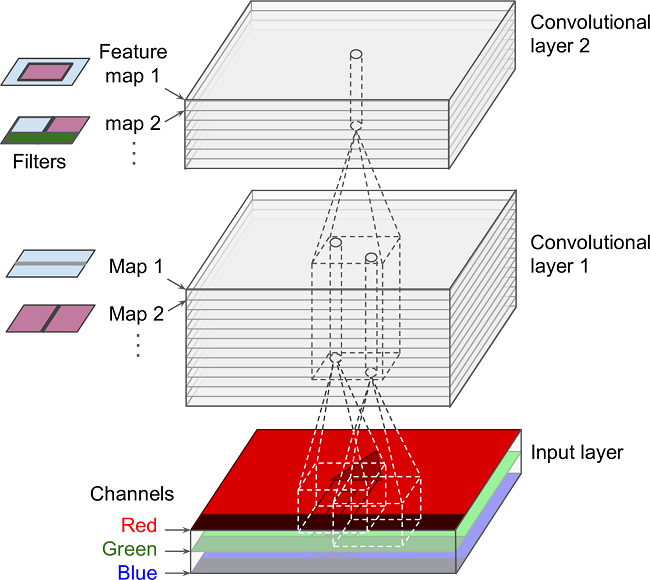
</p>
Figure 14-6. Convolutional layers with multiple feature maps, and images with three color channels

Specifically, a neuron located in row $i$ column $j$ of the feature map $k$ in a given convolutional layer $l$ is connected to the outputs of the neurons in the previous layer $l - 1$, located in **rows $i \times s_h$ to $i \times s_h + f_h - 1$ and columns $j \times s_w$ to $j \times s_w + f_w - 1$,** across all feature maps (in layer l – 1)

Note that **all neurons located in the same row i and column j but in different feature maps are connected to the outputs of the exact same neurons in the previous layer**

Equation 14-1 summarizes the preceding explanations in one big mathematical equation: it shows how to compute the output of a given neuron in a convolutional layer

**All it does is calculate the weighted sum of all the inputs, plus the bias term**

Equation 14-1. Computing the output of a neuron in a convolutional layer

<p align='center'>
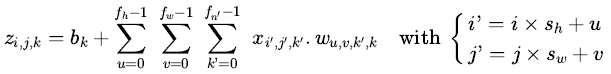
</p>

In this equation:

* $z_{i,j,k}$ is the output of the neuron located in row $i$, column $j$ in feature map $k$ of the convolutional layer (layer $l$)

* As explained earlier, $s_h$ and $s_w$ are the vertical and horizontal strides, $f_h$ and $f_w$ are the height and width of the receptive field, and $f_{n'}$ is the number of feature maps in the previous layer (layrer $l - 1$)

* $x_{i', j', k'}$ is the output of the neuron located in layer $l - 1$, row $i'$, column $j'$, feature map $k'$ (or channel $k′$ if the previous layer is the input layer)

* $b_k$ is the bias term for feature map $k$ (in layer $l$). You can think of it as a knob that tweaks the overall brightness of the feature map k 

* $w_{u, v, k', k}$ is the connection weight between any neuron in feature map $k$ of the layer $l$ and its input located at row $u$, column $v$ (relative to the neuron’s receptive field), and feature map $k′$

## TensorFlow Implementation

In TensorFlow, **each input image is typically represented as a 3D tensor of shape [height, width, channels]**

A **mini-batch** is represented as a **4D tensor** of shape **[mini-batch size, height, width, channels]**

The **weights** of a convolutional layer are represented as a **4D tensor of shape $[f_h , f_w , f_{n'} , f_n ]$**

The **bias** terms of a convolutional layer are simply represented as a **1D tensor of shape $[f_n]$**

Let’s look at a simple example. The following code **loads two sample images,** using Scikit-Learn’s load_simple_image(), then it **creates two filters and applies them to both images,** and finally it displays one of the resulting feature maps:

In [ ]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

Text(0.5, 1.0, 'Horizontal Line')

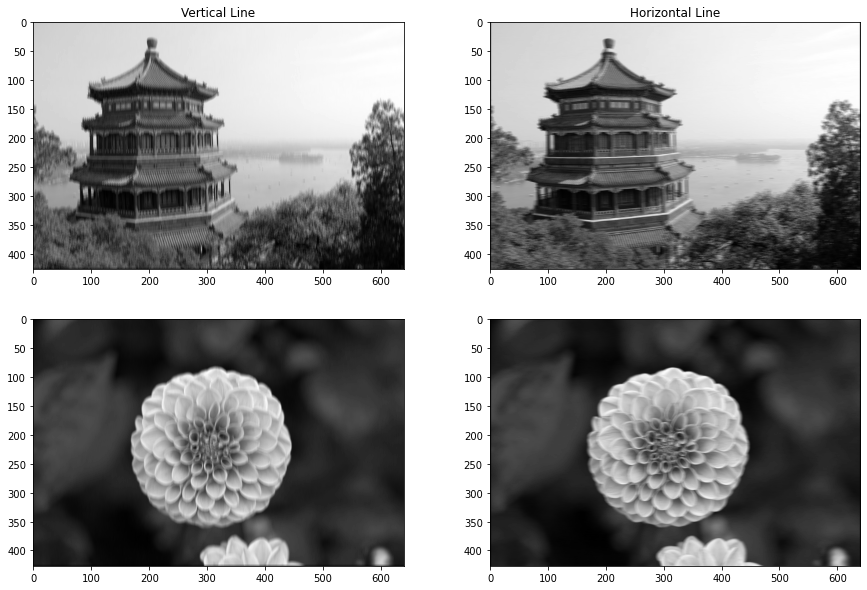

In [ ]:
# Load sample images
china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding='SAME')

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].imshow(outputs[0, :, :, 0], cmap='gray')
axs[0, 1].imshow(outputs[0, :, :, 1], cmap='gray') # plot 1st image's 2nd feature map
axs[1, 0].imshow(outputs[1, :, :, 0], cmap='gray')
axs[1, 1].imshow(outputs[1, :, :, 1], cmap='gray')
axs[0, 0].set_title('Vertical Line')
axs[0, 1].set_title('Horizontal Line')

Let’s go through this code:

* The pixel intensity for each color channel is represented as a byte from 0 to 255, so we scale these features simply by dividing by 255, to get floats ranging from 0 to 1

* Then we create two 7 × 7 filters (one with a vertical white line in the middle, and the other with a horizontal white line in the middle)

* We apply them to both images using the tf.nn.conv2d() function, which is part of TensorFlow’s low-level Deep Learning API. In this example, we use zero padding (padding="same") and a stride of 2

The tf.nn.conv2d() line deserves a bit more explanation:

* images is the input mini-batch (a 4D tensor, as explained earlier)

* filters is the set of filters to apply (also a 4D tensor)

* strides is equal to 1, but it could also be a 1D array with four elements, where the two central elements are the vertical and horizontal strides ($s_h$ and $s_w$). The first and last elements must currently be equal to 1. They may one day be used to specify a batch stride (to skip some instances) and a channel stride (to skip some of the previous layer’s feature maps or channels)

* **padding must be either "same" or "valid":**

  * If set to **"same",** the convolutional layer **uses zero padding if necessary.** The **output size** is set to the **number of input neurons divided by the stride, rounded up.** For example, if the **input size is 13 and the stride is 5** (see Figure 14-7), then the **output size is 3 (i.e., 13 / 5 = 2.6, rounded up to 3).** Then **zeros are added as evenly as possible around the inputs,** as needed. **When strides=1, the layer’s outputs will have the same spatial dimensions (width and height) as its inputs,** hence the name same

  * If set to **"valid",** the convolutional layer **does not use zero padding and may ignore some rows and columns at the bottom and right of the input image,** depending on the stride, as shown in Figure 14-7. This means that **every neuron’s receptive field lies strictly within valid positions inside the input** (it does not go out of bounds), hence the name valid

<p align='center'>
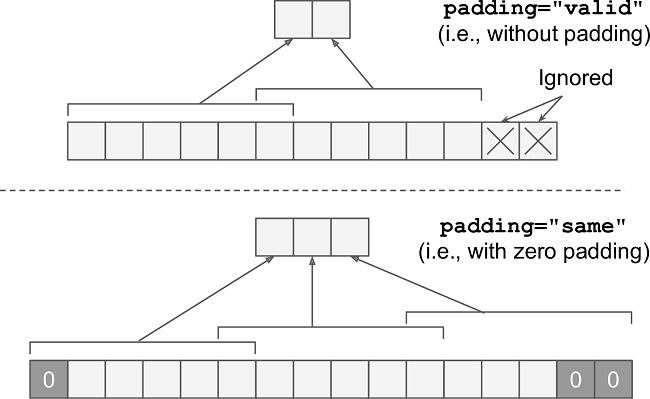
</p>
Figure 14-7. Padding="same” or “valid” (with input width 13, filter width 6, stride 5)

In this example we manually defined the filters, but **in a real CNN you would normally define filters as trainable variables** so the neural net can learn which filters work best, as explained earlier

Instead of manually creating the variables, use the **keras.layers.Conv2D** layer:

In [ ]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding='same', activation='relu')

This code creates a Conv2D layer with **32 filters, each 3 × 3,** using a **stride of 1** (both horizontally and vertically) and **"same" padding,** and applying the **ReLU activation** function to its outputs

As you can see, convolutional layers have quite a few hyperparameters: **you must choose the number of filters, their height and width, the strides, and the padding type**

As always, you can use **cross-validation** to find the right hyperparameter values, but this is very time-consuming

## Memory Requirements

Another problem with CNNs is that the **convolutional layers require a huge amount of RAM**

This is especially true **during training,** because the **reverse pass of backpropagation requires all the intermediate values computed during the forward pass**

For example, consider a convolutional layer with **5 × 5 filters, outputting 200 feature maps of size 150 × 100, with stride 1 and "same" padding**  

If the input is a **150 × 100 RGB image (three channels),** then the **number of parameters is (5 × 5 × 3 + 1) × 200 = 15,200** (the + 1 corresponds to the bias terms), which is fairly small compared to a fully connected layer

However, **each of the 200 feature maps contains 150 × 100 neurons, and each of these neurons needs to compute a weighted sum of its 5 × 5 × 3 = 75 inputs:** that’s a total of **225 million float multiplications.** Not as bad as a fully connected layer, but still quite computationally intensive

Moreover, if the feature maps are represented using **32-bit floats,** then the convolutional layer’s output will occupy **200 × 150 × 100 × 32 = 96 million bits (12 MB) of RAM.** And that’s just for one instance—**if a training batch contains 100 instances, then this layer will use up 1.2 GB of RAM**

**During inference** (i.e., when making a prediction for a new instance) the RAM occupied by one layer can be released as soon as the next layer has been computed, so you **only need as much RAM as required by two consecutive layers**

But **during training** everything computed during the forward pass needs to be preserved for the reverse pass, so the amount of **RAM needed is (at least) the total amount of RAM required by all layers**



# Pooling Layers

A pooling layer is to **subsample** (i.e., shrink) the **input image** in order to **reduce the computational load, the memory usage, and the number of parameters** (thereby limiting the risk of overfitting)

Just like in convolutional layers, **each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer, located within a small rectangular receptive field**

**You must define its size, the stride, and the padding type,** just like before

However, **a pooling neuron has no weights;** all it does is **aggregate the inputs** using an aggregation function such as the max or mean. Figure 14-8 shows a **max pooling layer,** which is the most common type of pooling layer

In this example, we use a 2 × 2 pooling kernel, with a stride of 2 and no padding. **Only the max input value in each receptive field makes it to the next layer, while the other inputs are dropped**

For example, in the lower-left receptive field in Figure 14-8, the input values are 1, 5, 3, 2, so only the **max value, 5, is propagated to the next layer**. Because of the stride of 2, the output image has half the height and half the width of the input image (rounded down since we use no padding)

<p align='center'>
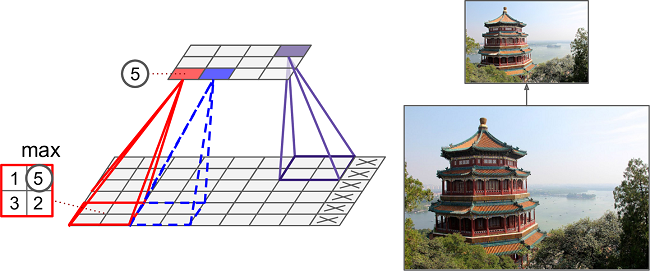
</p>
Figure 14-8. Max pooling layer (2 × 2 pooling kernel, stride 2, no padding)

A **max pooling layer** also introduces some level of **invariance to small translations,** as shown in Figure 14-9

Here we assume that the **bright pixels have a lower value than dark pixels,** and we consider three images (A, B, C) going through a max pooling layer with a **2 × 2 kernel and stride 2**

Images B and C are the same as image A, but shifted by one and two pixels to the right. As you can see, the outputs of the **max pooling layer for images A and B are identical.** This is what translation invariance means. For image C, the output is different: it is shifted one pixel to the right (but there is still 75% invariance)

Moreover, **max pooling offers** a small amount of **rotational invariance** and a slight **scale invariance**. Such invariance (even if it is limited) can be **useful in cases where the prediction should not depend on these details,** such as in **classification tasks**

By inserting a max pooling layer every few layers in a CNN, it is possible to get some level of translation invariance at a larger scale





<p align='center'>
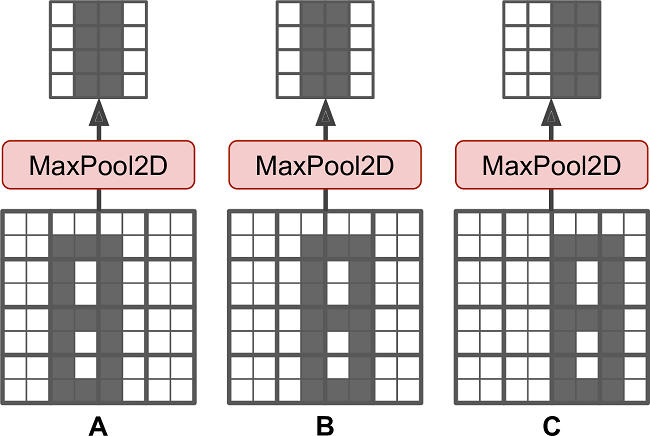
</p>
Figure 14-9. Invariance to small translations

However, max pooling has some downsides too. Firstly, it is obviously **very destructive:** even **with a tiny 2 x 2 kernel and a stride of 2, the output will be two times smaller in both directions** (so its area will be four times smaller), simply dropping 75% of the input values

**And in some applications, invariance is not desirable.** Take **semantic segmentation** (the task of classifying each pixel in an image according to the object that pixel belongs to): obviously, if the input image is translated by one pixel to the right, the output should also be translated by one pixel to the right. **The goal in this case is equivariance, not invariance: a small change to the inputs should lead to a corresponding small change in the output**

## TensorFlow Implementation

The following code creates a **max pooling layer using a 2 × 2 kernel**

**The strides default to the kernel size,** so this layer will use a stride of 2 (both horizontally and vertically). By default, it uses padding (i.e., no "valid" padding at all):

In [ ]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

To create an **average pooling layer,** just use **AvgPool2D** instead of  MaxPool2D, it computes the mean rather than the max

Average pooling layers used to be very popular, but people mostly use max pooling layers now, as they generally perform better

This may seem surprising, since **computing the mean generally loses less information than computing the max.** But on the other hand, **max pooling preserves only the strongest features, getting rid of all the meaningless ones, **so the next layers get a **cleaner signal** to work with. Moreover, **max pooling offers stronger translation invariance than average pooling, and it requires slightly less compute**

Note that max pooling and average pooling **can be performed along the depth dimension rather than the spatial dimensions,** although this is not as common. This can allow the CNN to learn to be **invariant to various features**

**For example, it could learn multiple filters, each detecting a different rotation of the same pattern** (such as hand-written digits; see Figure 14-10), and the **depthwise max pooling layer** would ensure that the **output is the same regardless of the rotation.** The CNN could similarly learn to be **invariant** to anything else: **thickness, brightness, skew, color,** and so on

<p align='center'>
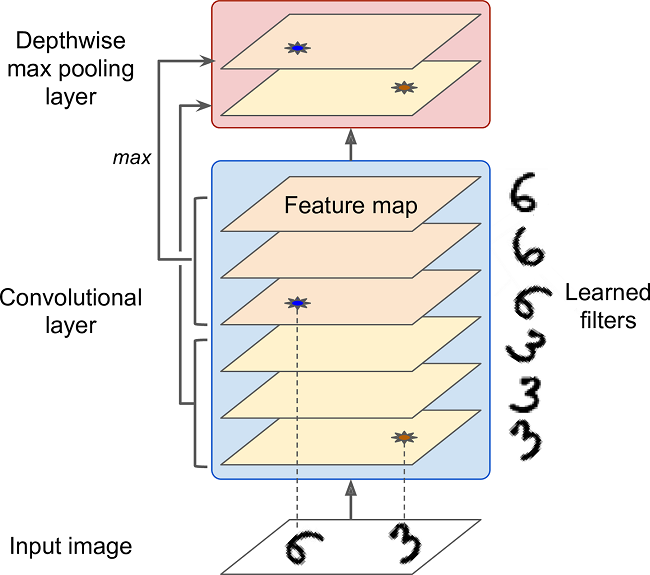
</p>
Figure 14-10. Depthwise max pooling can help the CNN learn any invariance

Keras does not include a depthwise max pooling layer, but TensorFlow’s low-level Deep Learning API does: just use the **tf.nn.max_pool()** function, and **specify the kernel size and strides as 4-tuples (i.e., tuples of size 4)**

The **first three values of each should be 1:** this indicates that the **kernel size and stride along the batch, height, and width dimensions should be 1**

The **last value should be whatever kernel size and stride** you want along the depth dimension—for example, 3 (this **must be a divisor of the input depth;** it will not work if the previous layer outputs 20 feature maps, since 20 is not a multiple of 3):

In [ ]:
#output = tf.nn.max_pool(images,
#                        ksize=(1, 1, 1, 3),
#                        strides=(1, 1, 1, 3),
#                        padding='VALID')

**If you want to include this as a layer in your Keras models, wrap it in a Lambda layer (or create a custom Keras layer): **

In [ ]:
depth_pool = keras.layers.Lambda(
    lambda X: tf.nn.max_pool(X, ksize=(1, 1, 1, 3),
                        strides=(1, 1, 1, 3),
                        padding='VALID'))

One last type of pooling layer that you will often see in modern architectures is the **global average pooling layer**

It works very differently: all it does is compute the **mean of each entire feature map** (it’ like an average pooling layer using a pooling kernel with the same spatial dimensions as the inputs). This means that it just **outputs a single number per feature map and per instance**

Although this is of course **extremely destructive** (most of the information in the feature map is lost), it **can be useful as the output layer**. To create such a layer, simply use the **keras.layers.GlobalAvgPool2D** class: 



In [ ]:
global_avg_pool = keras.layers.GlobalAvgPool2D()

It’s equivalent to this simple layer, which computes the mean over Lambda the spatial dimensions (height and width):

In [ ]:
global_avg_pool = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))

# CNN Architectures

Typical CNN architectures **stack a few convolutional layers** (each one generally **followed by a ReLU layer**), then a **pooling layer,** then another few convolutional layers (+ReLU), then another pooling layer, and so on

The **image gets smaller and smaller** as it progresses through the network, but it also typically gets **deeper and deeper (i.e., with more feature maps),** thanks to the convolutional layers (see Figure 14-11)

**At the top of the stack, a regular feedforward neural network is added, composed of a few fully connected layers** (+ReLUs), and the **final layer outputs the prediction** (e.g., a softmax layer that outputs estimated class probabilities)

<p align='center'>
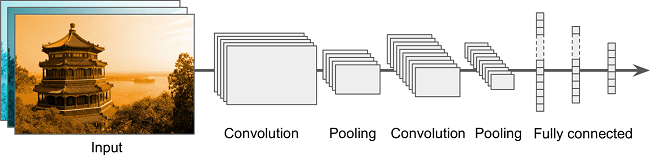
</p>
Figure 14-11. Typical CNN architecture

A **common mistake** is to **use convolution kernels that are too large.** For example, **instead of using a convolutional layer with a 5 x 5 kernel, stack two layers with 3 x 3 kernels:** it will use **fewer parameters** and require **fewer computations,** and it will usually **perform better** 

One exception is for the **first convolutional layer: it can typically have a large kernel (e.g., 5 x 5),** usually with a **stride of 2 or more:** this will **reduce the spatial dimension of the image without losing too much information,** and since the input image only has three channels in general, it will not be too costly

**Here is how you can implement a simple CNN to tackle the Fashion MNIST dataset:**

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same',
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

Let’s go through this model:

* The first layer uses **64 fairly large filters (7 x 7)** but **no stride** because the **input images are not very large.** It also sets input_shape=[28, 28, 1], because the images are 28 x 28 pixels, with a single color channel (i.e., grayscale)

* Next we have a max pooling layer which uses a **pool size of 2,** so it **divides each spatial dimension by a factor of 2**

* Then we **repeat the same structure twice: two convolutional layers followed by a max pooling layer.** For larger images, we could repeat this structure several more times (the number of repetitions is a hyperparameter you can tune)

* Note that the **number of filters grows as we climb up the CNN toward the output layer** (it is initially 64, then 128, then 256): it makes sense for it to grow, **since the number of low-level features is often fairly low (e.g., small circles, horizontal lines), but there are many different ways to combine them into higher-level features.** It is a **common practice to double the number of filters after each pooling layer:** since a **pooling layer divides each spatial dimension by a factor of 2, we can afford to double the number of feature maps** in the next layer without fear of exploding the number of parameters, memory usage, or computational load

* Next is the **fully connected network, composed of two hidden dense layers and a dense output layer.** Note that **we must flatten its inputs,** since a **dense network expects a 1D array of features for each instance.** We also add two **dropout layers,** with a dropout rate of 50% each, to **reduce overfitting**



Over the years, variants of this fundamental architecture have been developed, leading to amazing advances in the field. A good measure of this progress is the **error rate** in competitions such as the **ILSVRC** [ImageNet challenge](http://image-net.org/)



## LeNet-5

The [LeNet-5 architecture](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) is perhaps the most widely known CNN architecture. As mentioned earlier, it was created by Yann LeCun in 1998 and has been **widely used for handwritten digit recognition (MNIST).** It is composed of the layers shown in Table 14-1

Table 14-1. LeNet-5 architecture
<p align='center'>
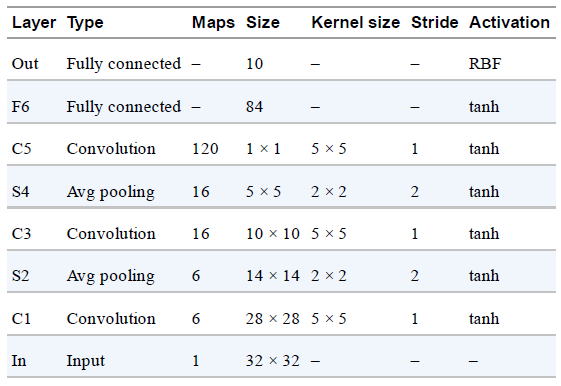
</p>

There are a few extra details to be noted:

* MNIST images are 28 x 28 pixels, but they are **zero-padded to 32 x 32 pixels** and normalized before being fed to the network. The **rest of the network does not use any padding,** which is why the **size keeps shrinking** as the image progresses through the network

* The average pooling layers are slightly more complex than usual: **each neuron computes the mean of its inputs,** then **multiplies the result by a learnable coefficient** (one per map) and **adds a learnable bias term** (again, one per map), then finally applies the activation function

* **Most neurons in C3 maps are connected to neurons in only three or four S2 maps (instead of all six S2 maps)**. See table 1 (page 8) in the original paper for details. 

* The **output layer** is a bit special: **instead of computing the matrix multiplication of the inputs and the weight vector, each neuron outputs the square of the Euclidian distance between its input vector and its weight vector.** 

* **Each output measures how much the image belongs to a particular digit class.** The **cross-entropy cost function** is now preferred, as it **penalizes bad predictions much more,** producing **larger gradients and converging faster**

Yann LeCun’s [website](http://yann.lecun.com/exdb/lenet/index.html) features great demos of LeNet-5 classifying digits

## AlexNet

The [AlexNet CNN architecture](https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html) won the 2012 ImageNet ILSVRC challenge by a large margin: it achieved a **top-five error rate of 17%,** while the second best achieved only 26%

It is similar to LeNet-5, only much larger and deeper, and it was the first to **stack convolutional layers directly on top of one another, instead of stacking a pooling layer on top of each convolutional layer**

Table 14-2 presents this architecture

Table 14-2. AlexNet architecture
<p align='center'>
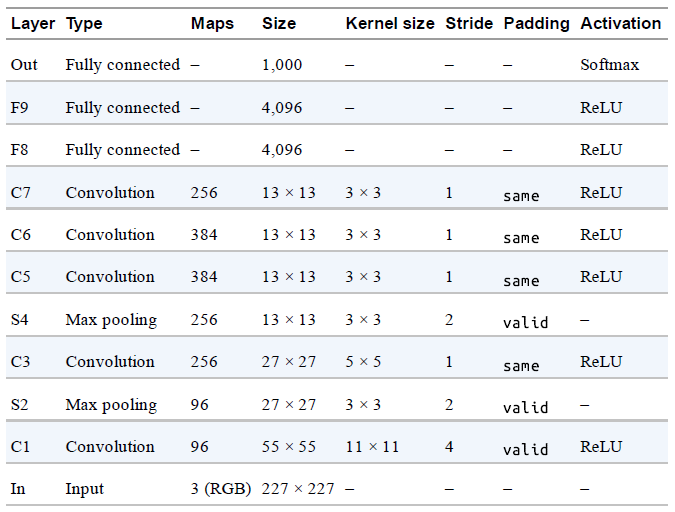
</p>

To reduce overfitting, the authors used two regularization techniques. First, they applied **dropout** with a 50% dropout rate during training to the outputs of layers **F8 and F9**

Second, they performed **data augmentation** by **randomly shifting the training images by various offsets, flipping them horizontally, and changing the lighting conditions**

AlexNet also uses a competitive **normalization** step immediately **after the ReLU step of layers C1 and C3,** called **local response normalization (LRN): the most strongly activated neurons inhibit other neurons located at the same position in neighboring feature maps** (such competitive activation has been observed in biological neurons)

This **encourages different feature maps to specialize,** pushing them apart and **forcing them to explore a wider range of features,** ultimately **improving generalization**

Equation 14-2 shows how to apply LRN

Equation 14-2. Local response normalization (LRN)
<p align='center'>
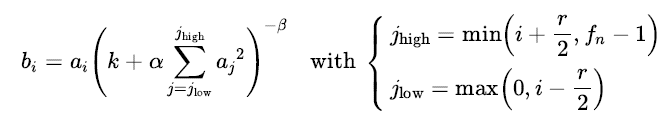
</p>

In this equation:

* **$b_i$ is the normalized output of the neuron** located in **feature map $i$,** at some **row $u$** and **column $v$** (note that in this equation we consider only neurons located at this row and column, so u and v are not shown)

* **$a_i$ is the activation of that neuron after the ReLU step, but before normalization**

* $k, \alpha, \beta, r$ are hyperparameters. $k$ is called the bias, and r is called the depth radius

* $f_n$ is the number of feature maps

For example, **if $r=2$ and a neuron has a strong activation, it will inhibit
the activation of the neurons located in the feature maps immediately
above and below its own**

In AlexNet, the hyperparameters are set as follows: **$r=2, \alpha=0.00002, \beta=0.75$ and $k=1$**. This step can be implemented using the **tf.nn.local_response_normalization()** function (which you can wrap in a Lambda layer if you want to use it in a Keras model) 


A variant of AlexNet called [ZF Net](https://arxiv.org/abs/1311.2901) was developed by Matthew Zeiler and Rob Fergus and won the 2013 ILSVRC challenge. It is essentially **AlexNet with a few tweaked hyperparameters (number of feature maps, kernel size, stride, etc.)**

##GoogLeNet

The [GoogLeNet architecture](https://www.cv-foundation.org/openaccess/content_cvpr_2015/html/Szegedy_Going_Deeper_With_2015_CVPR_paper.html) was developed by Christian Szegedy et al. from Google Research, and it won the ILSVRC 2014 challenge by pushing the top-five error rate below 7%

This great performance came in large part from the fact that **the network was much deeper than previous CNNs**

This was made possible by subnetworks called inception modules, which allow GoogLeNet to use parameters much more efficiently than previous architectures: GoogLeNet actually has **10 times fewer parameters than AlexNet** (roughly **6 million instead of 60 million**)

Figure 14-13 shows the architecture of an inception module. **The notation “3 x 3 + 1(S)” means that the layer uses a 3 x 3 kernel, stride 1, and "same" padding.** The **input signal is first copied and fed to four different layers.** All convolutional layers use the **ReLU activation function**

Note that the **second set of convolutional layers uses different kernel sizes** (1 x 1, 3 x 3, and 5 x 5), allowing them to **capture patterns at different scales**

Also note that **every single layer uses a stride of 1 and "same" padding** (even the max pooling layer), so their **outputs all have the same height and width as their inputs.** This makes it **possible to concatenate all the outputs along the depth dimension** in the final **depth concatenation layer** (i.e., stack the feature maps from all four top convolutional layers)

This concatenation layer can be implemented in TensorFlow using the tf.concat() operation, with axis=3 (the axis is the depth)

<p align='center'>
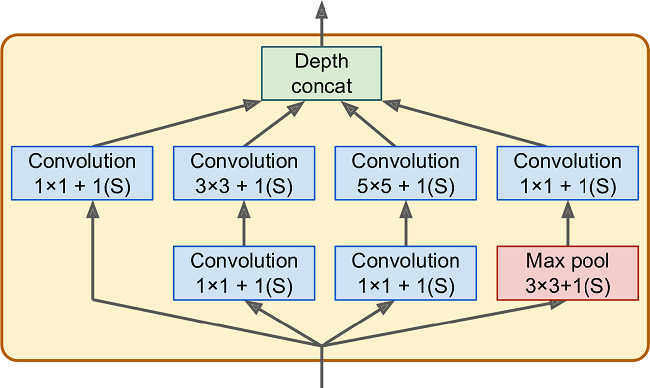
</p>
Figure 14-13. Inception module

You may wonder why inception modules have convolutional layers with **1 x 1 kernels.** Surely **these layers cannot capture any features because they look at only one pixel at a time?** In fact, the layers serve three purposes:

* Although they cannot capture spatial patterns, they can **capture patterns along the depth dimension**

* They are configured to **output fewer feature maps than their inputs,** so **they serve as bottleneck layers, meaning they reduce dimensionality.** This cuts the computational cost and the number of parameters, speeding up training and improving generalization

* **Each pair of convolutional layers** ([1 x 1, 3 x 3] and [1 x 1, 5 x 5]) **acts like a single powerful convolutional layer, capable of capturing more complex patterns.** Indeed, instead of sweeping a simple linear classifier across the image (as a single convolutional layer does), **this pair of convolutional layers sweeps a two-layer neural network across the image**

In short, you can think of the whole **inception module** as **a convolutional layer on steroids,** able to output feature maps that capture **complex patterns at various scales**

Now let’s look at the architecture of the GoogLeNet CNN (see Figure 14- 14). The number of feature maps output by each convolutional layer and each pooling layer is shown before the kernel size

The architecture is so deep that it has to be represented in three columns, but GoogLeNet is actually one tall stack, including **nine inception modules** (the boxes with the spinning tops)

The **six numbers** in the inception modules represent the **number of feature maps output by each convolutional layer in the module.** Note that all the convolutional layers use the **ReLU** activation function

<p align='center'>
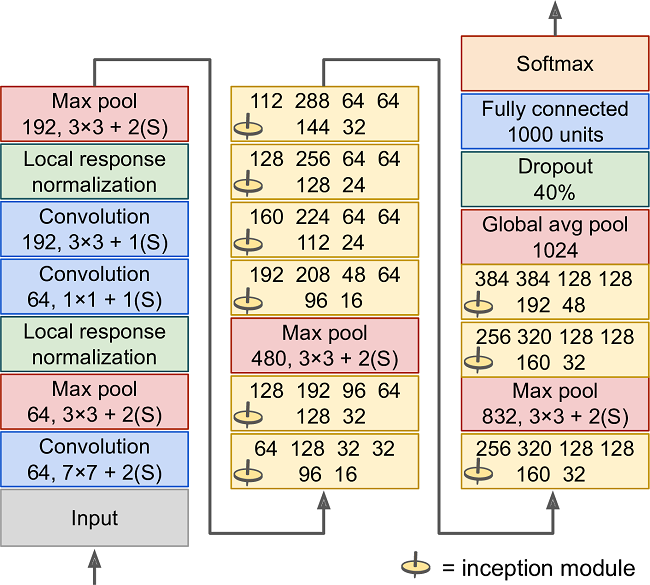
</p>
Figure 14-14. GoogLeNet architecture

Let’s go through this network:

* **The first two layers divide the image’s height and width by 4 (so its area is divided by 16), to reduce the computational load.** The **first layer** uses a **large kernel** size so that much of the **information is preserved**

* **Then the local response normalization layer ensures that the previous layers learn a wide variety of features**

* **Two convolutional layers follow, where the first acts like a bottleneck layer.** As explained earlier, you can think of this pair as a single smarter convolutional layer

* Again, a local response normalization layer ensures that the previous layers capture a wide variety of patterns

* Next, a **max pooling layer reduces the image height and width by 2,** again to speed up computations

* Then comes the tall **stack of nine inception modules,** interleaved with a couple **max pooling layers** to **reduce dimensionality** and speed up the net

* Next, the **global average pooling layer outputs the mean of each feature map: this drops any remaining spatial information,** which is fine because there was not much spatial information left at that point. Indeed, GoogLeNet input images are typically expected to be 224 x 224 pixels, so **after 5 max pooling layers, each dividing the height and width by 2, the feature maps are down to 7 x 7.** Moreover, it is a **classification task,** not localization, so it **does not matter where the object is.** **Thanks to the dimensionality reduction brought by this layer, there is no need to have several fully connected layers at the top of the CNN** (like in AlexNet), and this considerably reduces the number of parameters in the network and limits the risk of overfitting

* The last layers are self-explanatory: **dropout for regularization, then a fully connected layer with 1,000 units (since there are 1,000 classes) and a softmax activation function to output estimated class probabilities**

This diagram is slightly simplified: the original GoogLeNet architecture also included two **auxiliary classifiers** plugged on top of the **third and sixth inception modules**

They were both composed of** one average pooling layer, one convolutional layer, two fully connected layers, and a softmax activation layer. During training, their loss (scaled down by 70%) was added to the overall loss.** The goal was to fight the **vanishing gradients** problem and **regularize** the network. However, it was later shown that their effect was relatively minor

Several variants of the GoogLeNet architecture were later proposed by Google researchers, including Inception-v3 and Inception-v4, using slightly different inception modules and reaching even better performance

## VGGNet

The runner-up in the ILSVRC 2014 challenge was [VGGNet](https://arxiv.org/abs/1409.1556), developed by Karen Simonyan and Andrew Zisserman from the Visual Geometry Group (VGG) research lab at Oxford University

It had a **very simple and classical architecture,** with 2 or 3 convolutional layers and a pooling layer, then again 2 or 3 convolutional layers and a pooling layer, and so on (reaching a **total of just 16 or 19 convolutional layers,** depending on the VGG variant), plus a final **dense network with 2 hidden layers** and the output layer. It used only **3 × 3 filters, but many filters**


## ResNet

Kaiming He et al. won the ILSVRC 2015 challenge using a [Residual Network (or ResNet)](https://arxiv.org/abs/1512.03385), that delivered an astounding top-five error rate under 3.6%

The winning variant used an **extremely deep CNN composed of 152 layers** (other variants had 34, 50, and 101 layers). It confirmed the **general trend: models are getting deeper and deeper, with fewer and fewer parameters**

The key to being able to train such a deep network is to use **skip connections** (also called shortcut connections): **the signal feeding into a layer is also added to the output of a layer located a bit higher up the stack.** Let’s see why this is useful

**When training a neural network, the goal is to make it model a target function $h(x)$.** If you add the input x to the output of the network (i.e., you **add a skip connection),** then the network will be forced to model $f(x) = h(x) - x$ rather than $h(x)$. This is called **residual learning**

<p align='center'>
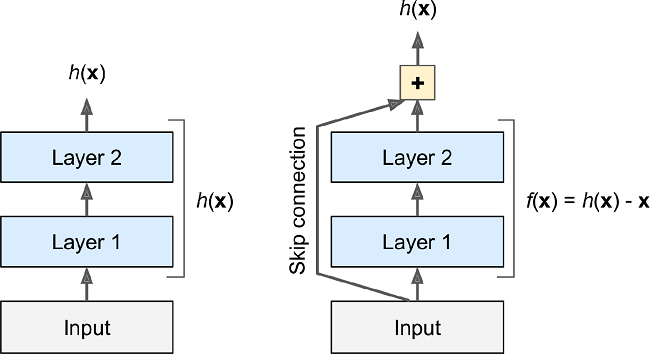
</p>
Figure 14-15. Residual learning

When you initialize a regular neural network, its weights are close to zero, so the network just outputs values close to zero. **If you add a skip connection, the resulting network just outputs a copy of its inputs; in other words, it initially models the identity function.** **If the target function is fairly close to the identity function** (which is often the case), this will **speed up training considerably**

Moreover, if you add many skip connections, **the network can start making progress even if several layers have not started learning yet** (see Figure 14-16). Thanks to skip connections, **the signal can easily make its way across the whole network.** The **deep residual network** can be seen as a **stack of residual units (RUs),** where each **residual unit** is a **small neural network with a skip connection**

<p align='center'>
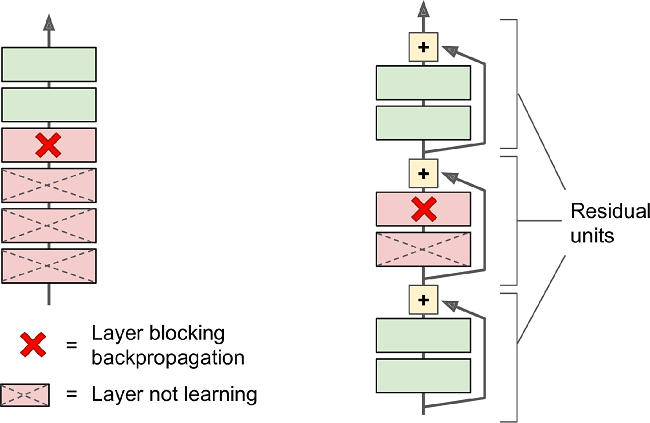
</p>
Figure 14-16. Regular deep neural network (left) and deep residual network (right)

Now let’s look at ResNet’s architecture (see Figure 14-17). It is surprisingly simple. **It starts and ends exactly like GoogLeNet** (except without a dropout layer), and in between is just a **very deep stack of simple residual units**

Each **residual unit** is composed of **two convolutional layers** (and no pooling layer!), with **Batch Normalization (BN) and ReLU activation,** using **3 × 3 kernels** and preserving spatial dimensions **(stride 1, "same" padding)** 

<p align='center'>
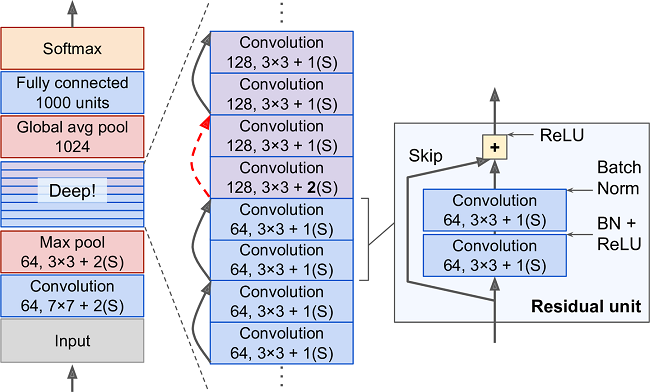
</p>
Figure 14-17. ResNet architecture

Note that the **number of feature maps is doubled every few residual units,** at the same time as their **height and width are halved** (using a convolutional layer with **stride 2)**

When this happens, the inputs **cannot be added directly to the outputs of the residual unit** because they **don’t have the same shape** (for example, this problem affects the skip connection represented by the **dashed arrow **in Figure 14-17)

To solve this problem, the inputs are passed through a 1 × 1 convolutional layer with stride 2 and the right number of output feature maps (see Figure 14-18)


<p align='center'>
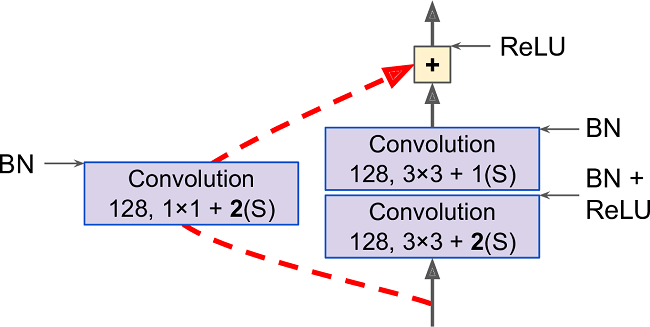
</p>
Figure 14-18. Skip connection when changing feature map size and depth

**ResNet-34 is the ResNet with 34 layers** (only counting the convolutional layers and the fully connected layer) containing **3 residual units that output 64 feature maps, 4 RUs with 128 maps, 6 RUs with 256 maps, and 3 RUs with 512 maps**

ResNets deeper than that, such as **ResNet-152,** use slightly different residual units. Instead of two 3 × 3 convolutional layers with, say, 256 feature maps, they use three convolutional layers: **first a 1 × 1 convolutional layer with just 64 feature maps (4 times less), which acts as a bottleneck layer, then a 3 × 3 layer with 64 feature maps, and finally another 1 × 1 convolutional layer with 256 feature maps (4 times 64) that restores the original depth.** ResNet-152 contains **3 such RUs that output 256 maps, then 8 RUs with 512 maps, a whopping 36 RUs with 1,024 maps, and finally 3 RUs with 2,048 maps**

Google’s [Inception-v4](https://arxiv.org/abs/1602.07261) architecture merged the ideas of GoogLeNet and ResNet and achieved a top-five error rate of close to 3% on ImageNet classification.

## Xception

Another variant of the GoogLeNet architecture is worth noting: [Xception](https://arxiv.org/abs/1610.02357) (which stands for **Extreme Inception**) was proposed in 2016 by François Chollet (the author of Keras), and it significantly **outperformed Inception v3** on a huge vision task (350 million images and 17,000 classes)

Just like Inception-v4, it **merges** the ideas of **GoogLeNet** and **ResNet,** but it **replaces the inception modules with** a special type of layer called a **depthwise separable convolution layer** (or separable convolution layer for short )

These layers had been used before in some CNN architectures, but they were not as central as in the Xception architecture. While a **regular convolutional layer** uses filters that try to **simultaneously** capture **spatial patterns (e.g., an oval)** and **cross-channel patterns (e.g., mouth + nose + eyes = face),** a **separable convolutional layer makes the strong assumption that spatial patterns and cross-channel patterns can be modeled separately** (see Figure 14-19)

Thus, it is composed of two parts: the **first part applies a single spatial filter for each input feature map,** then the **second part looks exclusively for cross-channel patterns**—it is just a **regular convolutional layer with 1 × 1 filters**


<p align='center'>
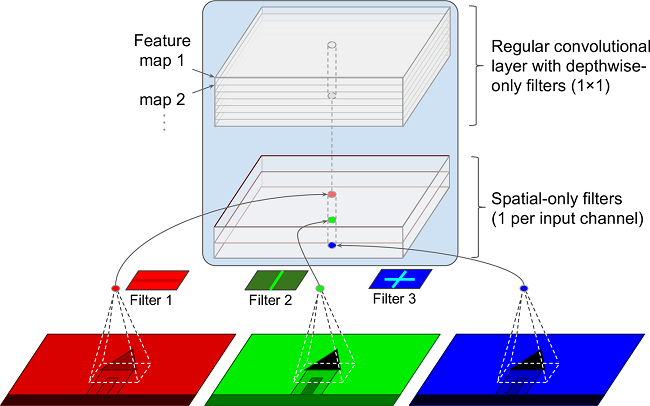
</p>
Figure 14-19. Depthwise separable convolutional layer

Since separable convolutional layers **only have one spatial filter per input channel,** you should **avoid using them after layers that have too few channels,** such as the input layer 

For this reason, the Xception architecture starts with 2 regular convolutional layers, but then the rest of the architecture uses only separable convolutions (34 in all), plus a few max pooling layers and the usual final layers (a global average pooling layer and a dense output layer)

You might wonder why Xception is considered a variant of GoogLeNet, since it contains no inception module at all. Well, as we discussed earlier, an inception module contains convolutional layers with 1 × 1 filters: these look exclusively for cross-channel patterns

However, the convolutional layers that sit on top of them are regular convolutional layers that look both for spatial and cross-channel patterns. So you can think of an **inception module as an intermediate between a regular convolutional layer** (which considers spatial patterns and cross-channel patterns jointly) **and a separable convolutional layer** (which considers them separately). In practice, it seems that **separable convolutional layers generally perform better**

**Separable convolutional layers** use **fewer parameters, less memory, and fewer computations** than regular convolutional layers, and in general they even perform better, so you should consider using them by default (except after layers with few channels)

The ILSVRC 2016 challenge was won by the CUImage team from the Chinese University of Hong Kong. They used an ensemble of many different techniques, including a sophisticated object-detection system called [GBD-Net](https://arxiv.org/pdf/1610.02579.pdf), to achieve a top-five error rate below 3%. Although this result is unquestionably impressive, the complexity of the solution contrasted with the simplicity of ResNets

## SENet

The winning architecture in the ILSVRC 2017 challenge was the [Squeeze-and-Excitation Network (SENet)](https://arxiv.org/abs/1709.01507). This architecture extends existing architectures such as inception networks and ResNets, and boosts their performance. This allowed SENet to win the competition with an astonishing 2.25% top-five error

The **extended versions of inception networks and ResNets are called SE-Inception and SE-ResNet,** respectively. The **boost** comes from the fact that a **SENet adds a small neural network, called an SE block, to every unit in the original architecture** (i.e., every inception module or every residual unit), as shown in Figure 14-20

<p align='cetner'>
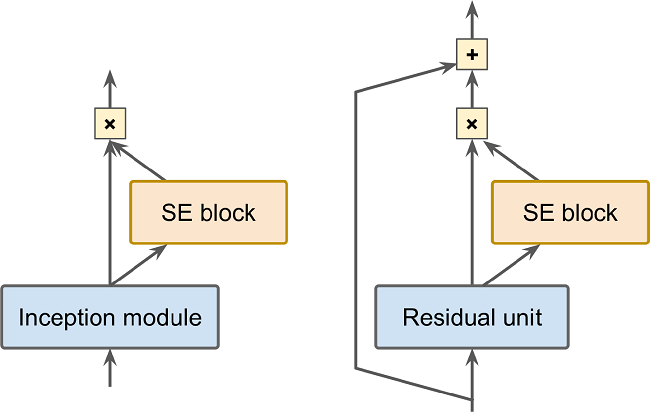
</p>
Figure 14-20. SE-Inception module (left) and SE-ResNet unit (right)

An **SE block** analyzes the output of the unit it is attached to, **focusing exclusively on the depth dimension** (it does not look for any spatial pattern), and it learns which features are usually most active together

**It then uses this information to recalibrate the feature maps,** as shown in Figure 14-21. For example, an SE block may learn that mouths, noses, and eyes usually appear together in pictures: **if you see a mouth and a nose, you should expect to see eyes as well**

So if the block sees a **strong activation** in the **mouth** and **nose** feature maps, but only **mild activation** in the **eye** feature map, it will **boost the eye feature map** (more accurately, it will **reduce irrelevant feature maps**). If the eyes were somewhat confused with something else, this feature map **recalibration** will help resolve the ambiguity

<p align='center'>
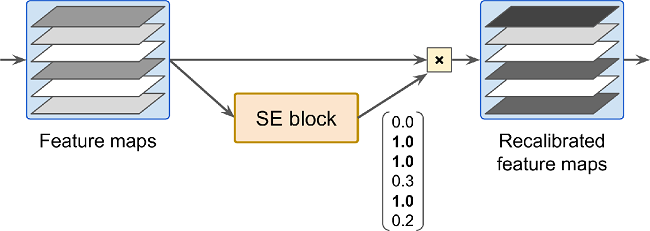
</p>
Figure 14-21. An SE block performs feature map recalibration

An **SE block** is composed of just three layers: a **global average pooling layer,** a hidden **dense** layer using the **ReLU** activation function, and a **dense** output layer using the **sigmoid** activation function (see Figure 14- 22)

<p align='center'>
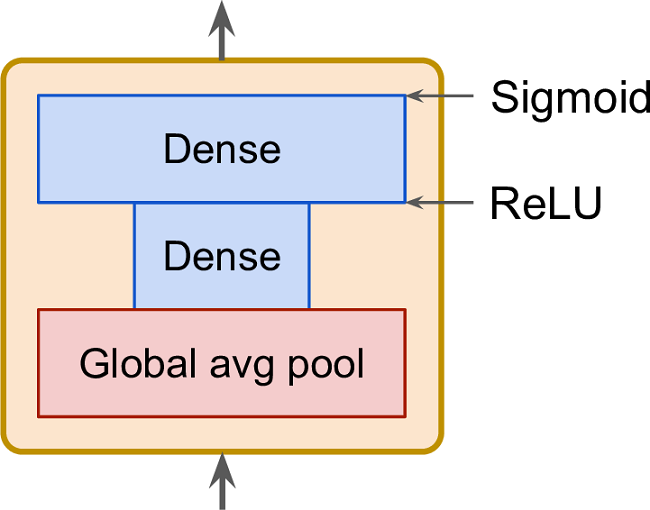
</p>
Figure 14-22. SE block architecture

As earlier, the **global average pooling layer computes the mean activation for each feature map:** for example, if its **input contains 256 feature maps, it will output 256 numbers** representing the overall level of response for each filter

The next layer is where the **“squeeze”** happens: this layer has **significantly fewer than 256 neurons—typically 16 times fewer than the number of feature maps** (e.g., 16 neurons)—so the 256 numbers get compressed into a small vector (e.g., 16 dimensions). This is a **low dimensional vector representation** (i.e., an embedding) of the **distribution of feature responses.** This bottleneck step forces the SE block to **learn a general representation of the feature combinations**

Finally, **the output layer takes the embedding and outputs a recalibration vector** containing **one number per feature map** (e.g., 256), each **between 0 and 1.** **The feature maps are then multiplied by this recalibration vector, so irrelevant features (with a low recalibration score) get scaled down while relevant features (with a recalibration score close to 1) are left alone**

## Data Augmentation

**Data augmentation** artificially increases the size of the training set by **generating many realistic variants of each training instance.** This reduces overfitting, making this a regularization technique

The generated instances should be as realistic as possible: **ideally, given an image from the augmented training set, a human should not be able to tell whether it was augmented or not.** Simply adding **white noise will not help;** the modifications should be learnable (white noise is not)

For example, you can slightly **shift, rotate, and resize** every picture in the training set by various amounts and add the resulting pictures to the training set (see Figure 14-12)

This forces the model to be more tolerant to variations in the position, orientation, and size of the objects in the pictures. **For a model that’s more tolerant of different lighting conditions, you can similarly generate many images with various contrasts**

In general, you can also **flip the pictures horizontally** (except for text, and other asymmetrical objects). By combining these transformations, you can greatly increase the size of your training set

<p align='center'>
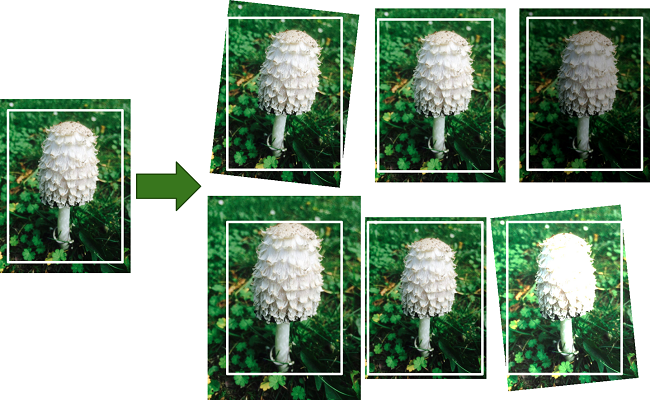
</p>
Figure 14-12. Generating new training instances from existing ones

# Implementing a ResNet-34 CNN Using Keras

Most CNN architectures described so far are fairly straightforward to implement. To illustrate the process, let’s implement a ResNet-34 from scratch using Keras. **First, let’s create a ResidualUnit layer:**

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

As you can see, this code matches Figure 14-18 pretty closely. In the **constructor**, we create all the layers we will need: the **main layers** are the ones on the **right side of the diagram,** and the **skip layers** are the ones on the **left** **(only needed if the stride is greater than 1)**

Then in the **call() method, we make the inputs go through the main layers and the skip layers** (if any), then we **add both outputs and apply the activation function**

Next, we can build the ResNet-34 using a Sequential model, since it’s really just a long sequence of layers **(we can treat each residual unit as a single layer now that we have the ResidualUnit class):**

In [ ]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[224, 224, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 112, 112, 64)      9408      
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 56, 56, 64)       

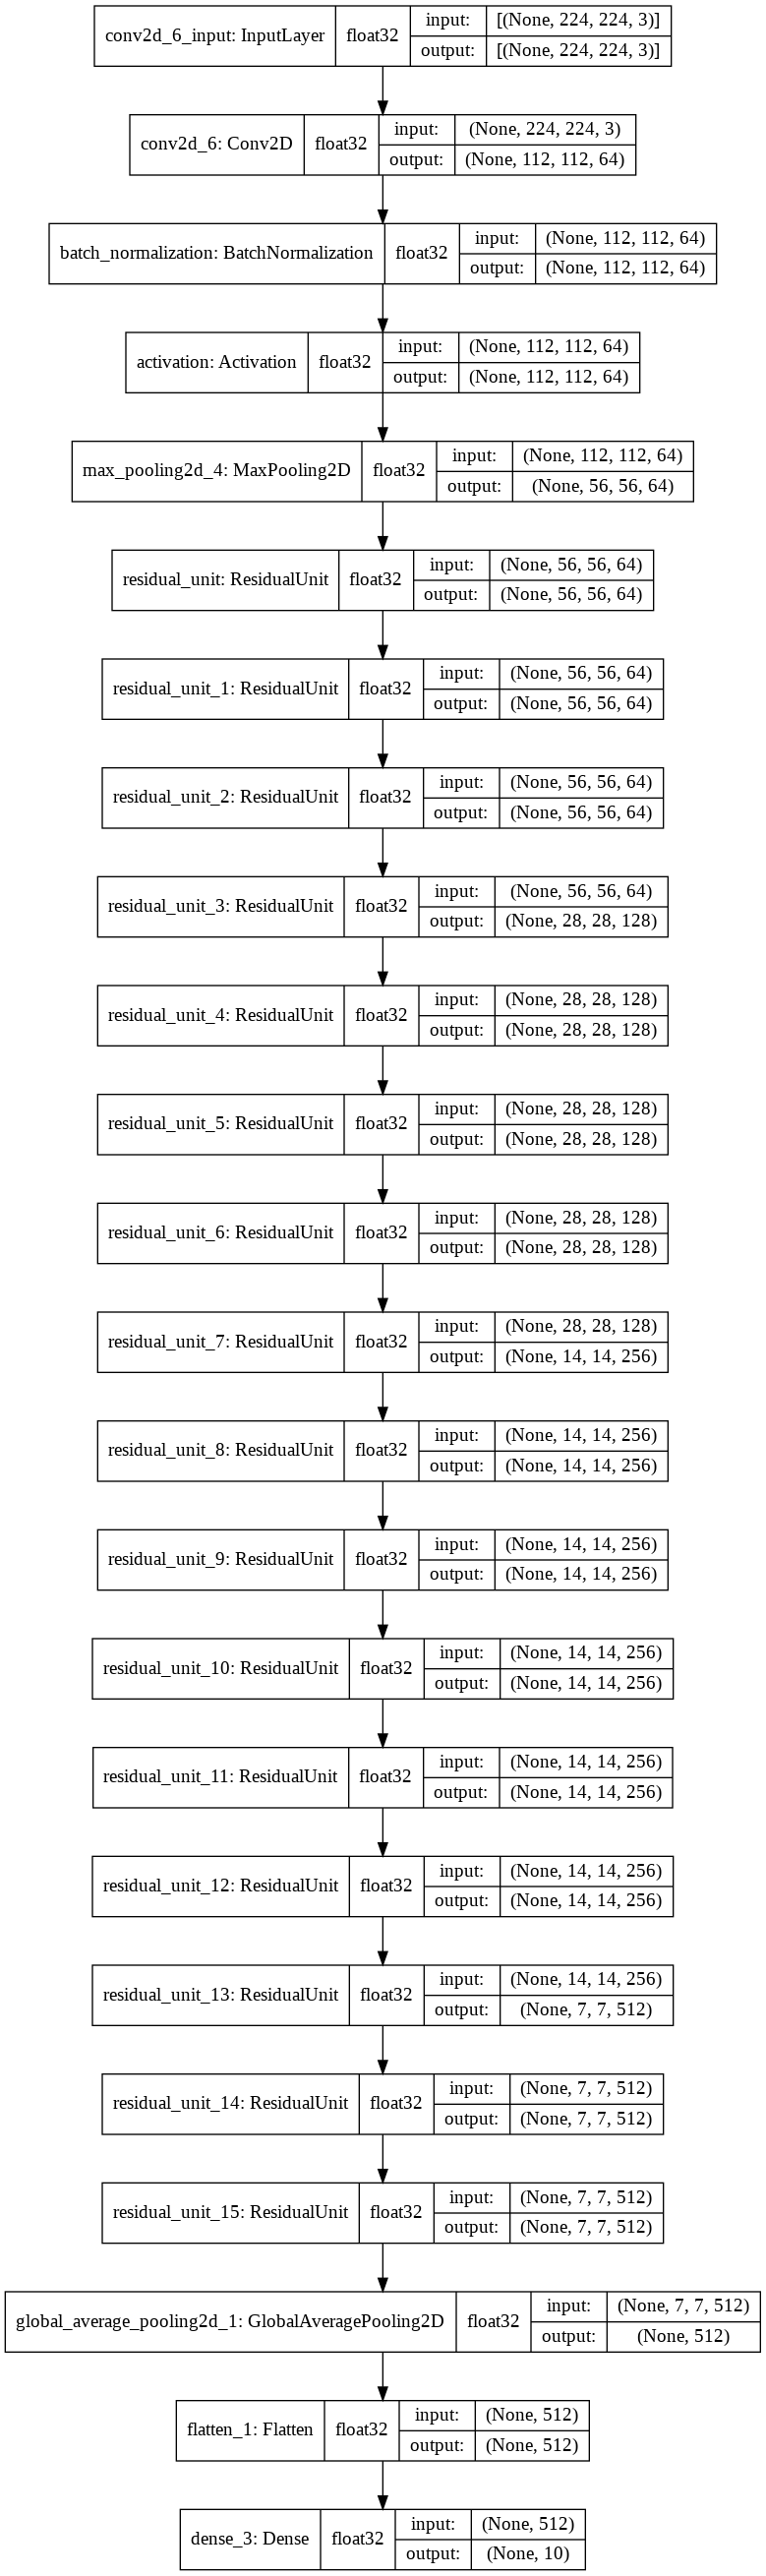

In [ ]:
keras.utils.plot_model(model, show_dtype=True, show_shapes=True, 
                       show_layer_names=True)

The only slightly tricky part in this code is the loop that adds the ResidualUnit layers to the model: as explained earlier, the first 3 RUs have 64 filters, then the next 4 RUs have 128 filters, and so on

We then **set the stride to 1 when the number of filters is the same as in the previous RU, or else we set it to 2.** Then we add the ResidualUnit and finally we update prev_filters

# Using Pretrained Models from Keras

In general, you won’t have to implement standard models like GoogLeNet or ResNet manually, since **pretrained networks** are readily available with a single line of code in the keras.applications package

For example, you can load the ResNet-50 model, pretrained on ImageNet, with the following line of code:

In [ ]:
model = keras.applications.resnet50.ResNet50(weights='imagenet')

102981632/102967424 [==============================] - 1s 0us/step


That’s all! This will create a ResNet-50 model and download weights pretrained on the ImageNet dataset

To use it, you first need to **ensure** that the **images have the right size.** A **ResNet-50 model expects 224 224- pixel images** (other models may expect other sizes, such as 299 x 299), so let’s use TensorFlow’s **tf.image.resize()** function to resize the images we loaded earlier:

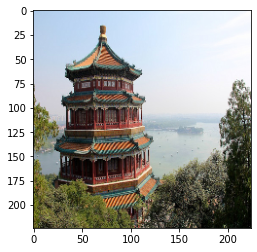

In [ ]:
import matplotlib.pyplot as plt
images_resized = tf.image.resize(images, [224, 224])
plt.imshow(images_resized[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


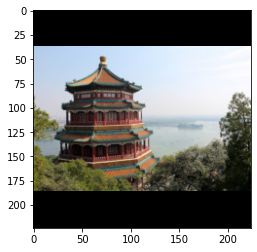

In [ ]:
images_resized = tf.image.resize_with_pad(images, 224, 224, antialias=True)
plt.imshow(images_resized[0])

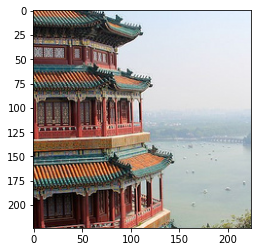

In [ ]:
images_resized = tf.image.resize_with_crop_or_pad(images, 224, 224)
plt.imshow(images_resized[0])

The **tf.image.resize() will not preserve the aspect ratio.** If this is a problem, try **cropping the images to the appropriate aspect ratio before resizing.** Both operations can be done in one shot with **tf.image.crop_and_resize()**



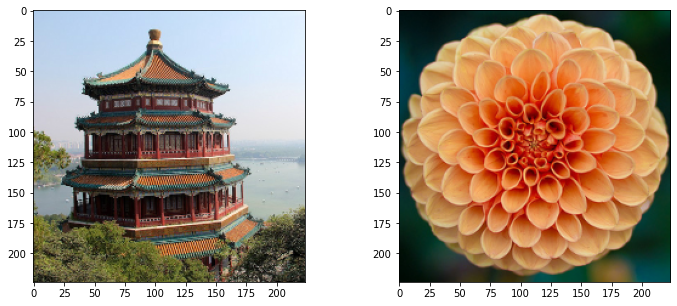

In [ ]:
china_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]
images_resized = tf.image.crop_and_resize(images, [china_box, flower_box], [0, 1], [224, 224])
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(images_resized[0])
ax[1].imshow(images_resized[1])

The **pretrained models** assume that the images are preprocessed in a specific way. In some cases they may **expect the inputs to be scaled from 0 to 1, or –1 to 1,** and so on. Each model provides a preprocess_input() function that you can use to preprocess your images

These functions assume that the pixel values range from 0 to 255, so we must multiply them by 255 (since earlier we scaled them to the 0–1 range):

In [ ]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

Now we can use the pretrained model to make predictions:

In [ ]:
Y_proba = model.predict(inputs)

In [ ]:
Y_proba.shape

(2, 1000)

As usual, the **Y_proba** output is a matrix with **one row per image and one column per class** (in this case, there are 1,000 classes)

If you want to display the **top K predictions,** including the class name and the estimated probability of each predicted class, use the **decode_predictions()** function

For each image, it returns an array containing the top K predictions, where each prediction is represented as an array containing the **class identifier, its name, and the corresponding confidence score:**


In [ ]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)

49152/35363 [=========================================] - 0s 0us/step


In [ ]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

Image #0
  n03877845 - palace       43.39%
  n02825657 - bell_cote    43.07%
  n03781244 - monastery    11.70%

Image #1
  n04522168 - vase         53.96%
  n07930864 - cup          9.52%
  n11939491 - daisy        4.97%



The correct classes (monastery and daisy) appear in the top three results for both images. That’s pretty good, considering that the model had to choose from among 1,000 classes

**Other vision models are available in keras.applications,** including several ResNet variants, GoogLeNet variants like Inception-v3 and Xception, VGGNet variants, and MobileNet and MobileNetV2 (lightweight models for use in mobile applications)

# Pretrained Models for Transfer Learning

If you want to build an image classifier but you do not have enough training data, then it is often a good idea to **reuse the lower layers of a pretrained model**

For example, let’s **train a model to classify pictures of flowers, reusing a pretrained Xception model.** First, let’s load the dataset using TensorFlow Datasets:

In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('tf_flowers', as_supervised=True,
                          with_info=True)
dataset_size = info.splits['train'].num_examples # 3670
class_names = info.features['label'].names # ['dandelion', 'daisy', ...]
n_classes =  info.features['label'].num_classes # 5

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


Note that you can **get information about the dataset** by setting **with_info=True.** Here, we get the dataset **size** and the **names of the classes**

Unfortunately, there is only a "train" dataset, no test set or validation set, **so we need to split the training set.** The TF Datasets project provides an API for this

For example, let’s take the first 10% of the dataset for testing, the next 15% for validation, and the remaining 75% for training:

In [ ]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    'tf_flowers',
    split=['train[:10%]', 'train[10%:25%]', 'train[25%:]'],
    as_supervised=True)

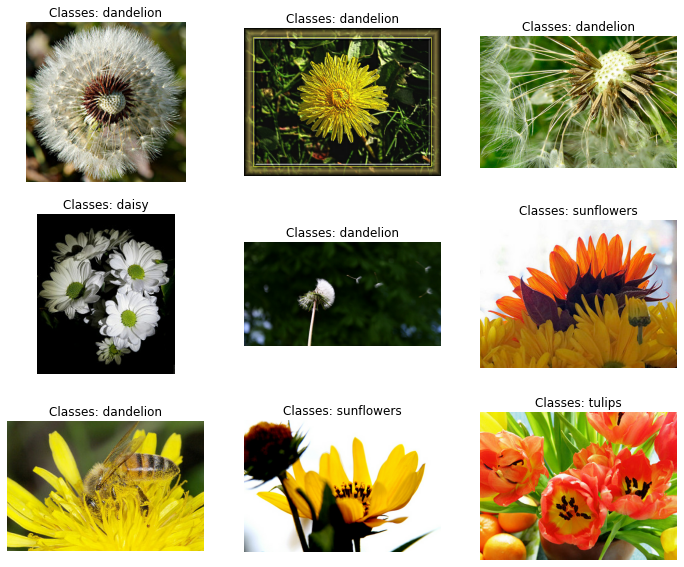

In [ ]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
  index += 1
  plt.subplot(3, 3, index)
  plt.imshow(image)
  plt.title('Classes: {}'.format(class_names[label]))
  plt.axis('off')
  

Next we must preprocess the images. The CNN expects **224 × 224 images,** so we need to **resize** them

We also need to **run the images through Xception’s preprocess_input() function:**

In [ ]:
def preprocess(image, label):
  resized_image = tf.image.resize(image, [224, 224])
  final_image = keras.applications.xception.preprocess_input(resized_image)
  return final_image, label

Let’s apply this preprocessing function to all three datasets, shuffle the training set, and add batching and prefetching to all the datasets:

In [ ]:
batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

If you want to perform some **data augmentation,** change the preprocessing function for the training set, adding some random transformations to the training images

For example, use **tf.image.random_crop()** to **randomly crop the images,** use **tf.image.random_flip_left_right()** to **randomly flip the images horizontally,** and so on



In [ ]:
def random_crop(image):
  shape = tf.shape(image)
  min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
  return tf.image.random_crop(image, [min_dim, min_dim, 3])

The **keras.preprocessing.image.ImageDataGenerator** class makes it easy to **load images from disk and augment** them in various ways: you can **shift** each image, **rotate** it, **rescale** it, **flip** it horizontally or vertically, **shear** it, or apply any transformation function you want to it

However, **building a tf.data pipeline has many advantages:** it can **read the images efficiently (e.g., in parallel) from any source,** not just the local disk; you can manipulate the Dataset as you wish; and if you **write a preprocessing function based on tf.image operations,** this function can be used both in the tf.data pipeline and in the model you will deploy to production

Next let’s load an Xception model, pretrained on ImageNet. We **exclude the top** of the network by setting **include_top=False:** this **excludes the global average pooling layer and the dense output layer**

We then add our **own global average pooling layer,** based on the output of the base model, followed by a **dense output layer with one unit per class,** using the **softmax activation function.** Finally, we create the Keras Model:

In [ ]:
base_model = keras.applications.xception.Xception(weights='imagenet',
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

83697664/83683744 [==============================] - 2s 0us/step


As explained in Chapter 11, it’s usually a good idea to freeze the weights of the pretrained layers, at least at the beginning of training:

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

**Since our model uses the base model’s layers directly, rather than the base_model object itself, setting base_model.trainable=False would have no effect**

Finally, we can compile the model and start training:

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5
86/86 [==============================] - 37s 365ms/step - loss: 1.3917 - accuracy: 0.7932 - val_loss: 1.3927 - val_accuracy: 0.8199
Epoch 2/5
86/86 [==============================] - 31s 357ms/step - loss: 0.5399 - accuracy: 0.8975 - val_loss: 0.8352 - val_accuracy: 0.8713
Epoch 3/5
86/86 [==============================] - 31s 358ms/step - loss: 0.2242 - accuracy: 0.9477 - val_loss: 0.8368 - val_accuracy: 0.8695
Epoch 4/5
86/86 [==============================] - 31s 357ms/step - loss: 0.1190 - accuracy: 0.9658 - val_loss: 0.7719 - val_accuracy: 0.8658
Epoch 5/5
86/86 [==============================] - 31s 359ms/step - loss: 0.0817 - accuracy: 0.9775 - val_loss: 0.7125 - val_accuracy: 0.8732


Text(0, 0.5, 'Loss')

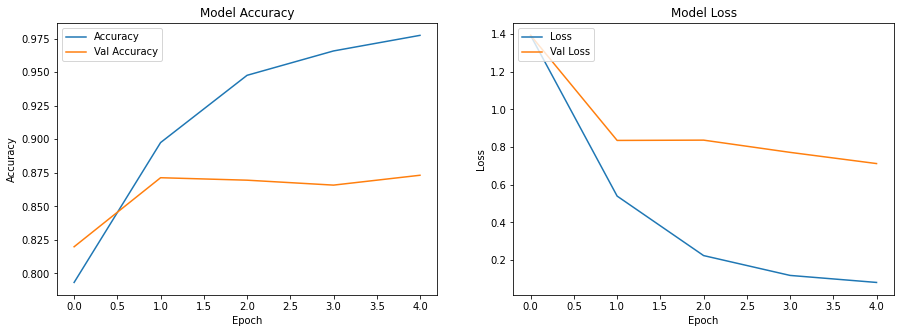

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['accuracy'], label='Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Val Accuracy')
ax[0].legend(loc='upper left')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[1].plot(history.history['loss'], label='Loss')
ax[1].plot(history.history['val_loss'], label='Val Loss')
ax[1].legend(loc='upper left')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

After training the model for a few epochs, its **validation accuracy should reach about 75–80% and stop making much progress.** This means that the **top layers are now pretty well trained,** so we are ready to **unfreeze all the layers** (or you could try unfreezing just the top ones) and **continue training** (don’t forget to **compile the model when you freeze or unfreeze layers**)

This time we use a **much lower learning rate** to **avoid damaging the pretrained weights:**

In [ ]:
for layer in base_model.layers:
  layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
 
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5) # 40 epochs originally

Epoch 1/5
86/86 [==============================] - 122s 1s/step - loss: 0.3780 - accuracy: 0.8826 - val_loss: 0.6574 - val_accuracy: 0.8438
Epoch 2/5
86/86 [==============================] - 113s 1s/step - loss: 0.0692 - accuracy: 0.9778 - val_loss: 0.3560 - val_accuracy: 0.9099
Epoch 3/5
86/86 [==============================] - 113s 1s/step - loss: 0.0189 - accuracy: 0.9931 - val_loss: 0.3269 - val_accuracy: 0.9210
Epoch 4/5
86/86 [==============================] - 114s 1s/step - loss: 0.0110 - accuracy: 0.9953 - val_loss: 0.3697 - val_accuracy: 0.9118
Epoch 5/5
86/86 [==============================] - 114s 1s/step - loss: 0.0041 - accuracy: 0.9996 - val_loss: 0.3762 - val_accuracy: 0.9173


Text(0, 0.5, 'Loss')

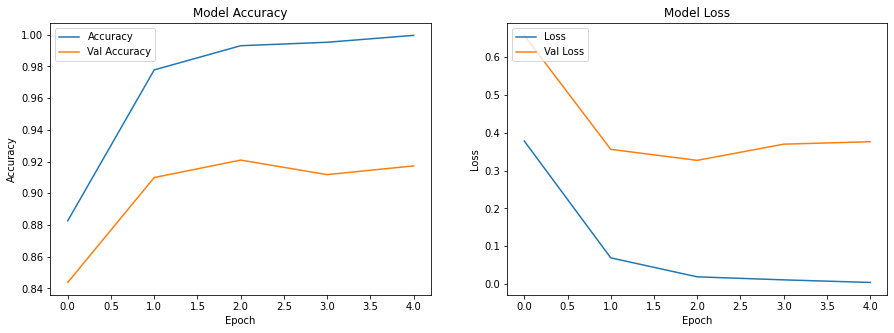

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['accuracy'], label='Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Val Accuracy')
ax[0].legend(loc='upper left')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[1].plot(history.history['loss'], label='Loss')
ax[1].plot(history.history['val_loss'], label='Val Loss')
ax[1].legend(loc='upper left')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

This model should reach around 95% accuracy on the test set. With that, you can start training image classifiers

But there’s more to computer vision than just classification. For example, what if you also want to know **where the flower is in the picture?** Let’s look at this now

# Classification and Localization

**Localizing** an object in a picture can be expressed as a **regression task,** as discussed in Chapter 10: to predict a **bounding box** around the object, a common approach is to predict the **horizontal and vertical coordinates of the object’s center,** as well as its **height** and **width**

This means we have **four numbers to predict.** It does not require much change to the model; we just need to **add a second dense output layer with four units** (typically **on top of the global average pooling layer**), and it can be trained using the **MSE loss:**

In [ ]:
base_model = keras.applications.xception.Xception(weights='imagenet',
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = keras.layers.Dense(n_classes, activation='softmax')(avg)
loc_output = keras.layers.Dense(4)(avg)
model = keras.models.Model(inputs=base_model.input,
                           outputs=[class_output, loc_output])
model.compile(loss=['sparse_categorical_crossentropy', 'mse'],
              loss_weights=[0.8, 0.2], # depends on what you care most about
              optimizer=optimizer, metrics=['accuracy'])

But now we have a problem: **the flowers dataset does not have bounding boxes around the flowers.** So, we need to add them ourselves. This is often one of the hardest and most costly parts of a Machine Learning project: getting the labels

To **annotate images with bounding boxes,** you may want to use an open source image labeling tool like **VGG Image Annotator, LabelImg, OpenLabeler, or ImgLab,** or perhaps a commercial tool like **LabelBox** or **Supervisely**

You may also want to consider **crowdsourcing** platforms such as **Amazon Mechanical Turk** if you have a very large number of images to annotate. Adriana Kovashka et al. wrote a very practical [paper](https://arxiv.org/abs/1611.02145) about crowdsourcing in computer vision  

Let’s suppose you’ve obtained the bounding boxes for every image in the flowers dataset (for now we will **assume there is a single bounding box per image**). You then need to create a dataset whose items will be batches of preprocessed images along with their class labels and their bounding boxes. **Each item should be a tuple of the form (images, (class_labels, bounding_boxes)).** Then you are ready to train your model

The bounding boxes should be **normalized** so that the **horizontal and vertical coordinates,** as well as the **height** and **width,** **all range from 0 to 1**

Also, it is common to **predict the square root of the height and width** rather than the height and width directly: this way, **a 10-pixel error for a large bounding box will not be penalized as much as a 10-pixel error for a small bounding box**

The most common metric for evaluating how well the model can **predict bounding boxes** is the **Intersection over Union (IoU):** the area of **overlap** between the predicted bounding box and the target bounding box, **divided by the area of their union** (see Figure 14- 23)

In tf.keras, it is implemented by the **tf.keras.metrics.MeanIoU** class

<p align='center'>
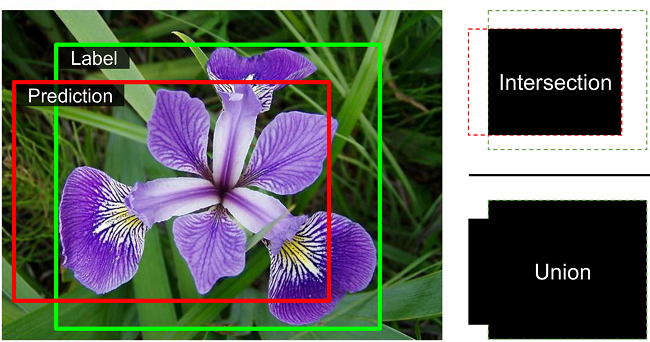
</p>
Figure 14-23. Intersection over Union (IoU) metric for bounding boxes

Classifying and localizing a single object is nice, but what if the images contain **multiple objects**

# Object Detection

The task of **classifying and localizing multiple objects** in an image is called **object detection**

Until a few years ago, a common approach was to **take a CNN that was trained to classify and locate a single object,** then **slide** it **across the image,** as shown in Figure 14-24

In this example, the image was chopped into a 6 × 8 grid, and we show a **CNN** (the thick **black rectangle**) sliding across all 3 × 3 regions. When the CNN was looking at the **top left** of the image, it d**etected part of the leftmost rose,** and then it detected that **same rose again** when it was first **shifted one step to the right**

At the next step, it started detecting part of the topmost rose, and then it detected it again once it was shifted one more step to the right. You would then continue to slide the CNN through the whole image, looking at all 3 × 3 regions

Moreover, since objects can have varying sizes, you would also **slide the CNN across regions of different sizes.** For example, once you are done with the 3 × 3 regions, you might want to slide the CNN across all 4 × 4 regions as well

<p align='center'>
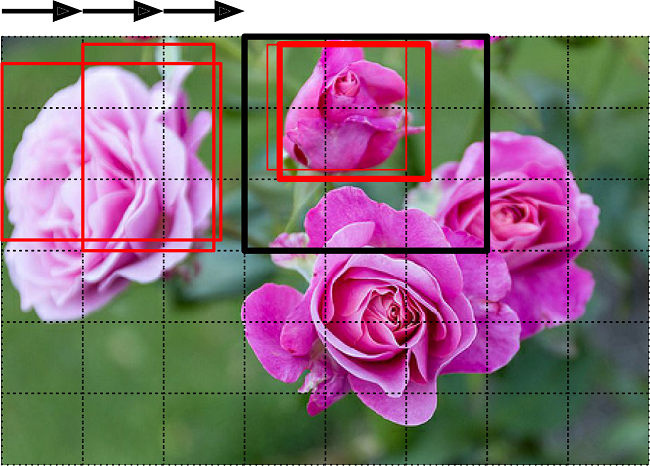
</p>
Figure 14-24. Detecting multiple objects by sliding a CNN across the image

This technique is fairly straightforward, but as you can see it will detect the **same object multiple times,** at slightly different positions. Some **post processing** will then be needed to get rid of all the **unnecessary bounding boxes**

A common approach for this is called **non-max suppression.** Here’s how you do it:

* First, you need to add an **extra objectness output** to your CNN, to estimate the **probability** that a **flower is indeed present in the image** (alternatively, you could add a “no-flower” class, but this usually does not work as well)

* It must use the **sigmoid activation function,** and you can train it using **binary cross-entropy loss.** Then **get rid of all the bounding boxes for which the objectness score is below some threshold:** this will drop all the bounding boxes that don’t actually contain a flower

* Second, Find the **bounding box with the highest objectness score,** and get rid of all the other bounding boxes that overlap a lot with it (e.g.,with an IoU greater than 60%)

* For example, in Figure 14-24, the bounding box with the max objectness score is the thick bounding box over the topmost rose (the objectness score is represented by the thickness of the bounding boxes). The other bounding box over that same rose overlaps a lot with the max bounding box, so we will get rid of it

* Repeat step two until there are no more bounding boxes to get rid of

Fortunately, there is a much **faster** way to slide a CNN across an image: using a **fully convolutional network (FCN)**


## Fully Convolutional Networks

The idea of FCNs was first introduced in a [2015 paper](https://arxiv.org/abs/1411.4038) by Jonathan Long et al., for **semantic segmentation** (the task of classifying every pixel in an image according to the class of the object it belongs to)

The authors pointed out that you could **replace the dense layers at the top of a CNN by convolutional layers.** To understand this, let’s look at an example: suppose a **dense layer with 200 neurons** sits on top of a convolutional layer that outputs **100 feature maps,** each of size **7 × 7** (this is the feature map size, not the kernel size). **Each neuron will compute a weighted sum of all 100 × 7 × 7 activations from the convolutional layer** (plus a bias term)

Now let’s see what happens if we **replace** the dense layer with a **convolutional layer** using **200 filters,** each of size **7 × 7,** and with padding **"valid"**

This layer will **output 200 feature maps, each 1 × 1** (since the **kernel** is **exactly the size of the input feature maps** and we are using padding) **"valid"**). In other words, **it will output 200 numbers,** just like the dense layer did; and if you look closely at the computations performed by a convolutional layer, you will notice that these numbers will be precisely the same as those the dense layer produced

To **convert a dense layer to a convolutional layer,** the number of **filters** in the convolutional layer must be equal to the **number of units in the dense layer,** the **filter size** must be **equal** to the **size of the input feature maps**, and you must use **"valid"** padding. The stride may be set to 1 or more

The only difference is that the **dense** layer’s output was a tensor of shape **[batch size, 200],** while the **convolutional** layer will output a tensor of shape **[batch size, 1, 1, 200]**

Why is this important? Well, while a **dense layer expects a specific input size** (since it has **one weight per input feature**), **a convolutional layer will happily process images of any size** (however, it does **expect** its inputs to have a **specific number of channels,** since each kernel contains a different set of weights for each input channel). Since an FCN contains **only convolutional layers** (and pooling layers, which have the same property), it can be trained and executed on **images of any size**


For example, suppose we’d already trained a **CNN for flower classification and localization.** It was trained on **224 × 224 images,** and it **outputs 10 numbers:** outputs **0 to 4** are sent through the softmax activation function, and this gives the **class probabilities** (one per class); output **5** is sent through the logistic activation function, and this gives the **objectness** score; outputs **6 to 9** do not use any activation function, and they represent the **bounding box**’s center coordinates, as well as its height and width

We can now convert its dense layers to convolutional layers. In fact, we don’t even need to retrain it; we can just **copy the weights** from the **dense layers to the convolutional layers!** Alternatively, we could have converted the CNN into an FCN before training

Now suppose the last convolutional layer before the output layer (also called the bottleneck layer) outputs 7 x 7 feature maps when the network is fed a 224 x 224 image (see the left side of Figure 14-25). If we feed the FCN a 448 x 448 image (see the right side of Figure 14-25), the bottleneck layer will now output 14 x 14 feature maps

Since the **dense** output layer was **replaced** by a **convolutional** layer using **10 filters** of size **7 x 7,** with **"valid"** padding and **stride 1,** the output will be composed of 10 features "valid" maps, each of size 8 x 8 (since 14 – 7 + 1 = 8)

In other words, the FCN will process the whole image only once, and it will **output an 8 x 8 grid where each cell contains 10 numbers** (5 class probabilities, 1 objectness score, and 4 bounding box coordinates). It’s exactly like taking the original CNN and sliding it across the image using 8 steps per row and 8 steps per column

To visualize this, imagine chopping the original image into a 14 x 14 grid, then sliding a 7 x 7 window across this grid; there will be 8 x 8 = 64 possible locations for the window, hence 8 x 8 predictions. However, the FCN approach is much more efficient, since the network only looks at the image once


<p align='center'>
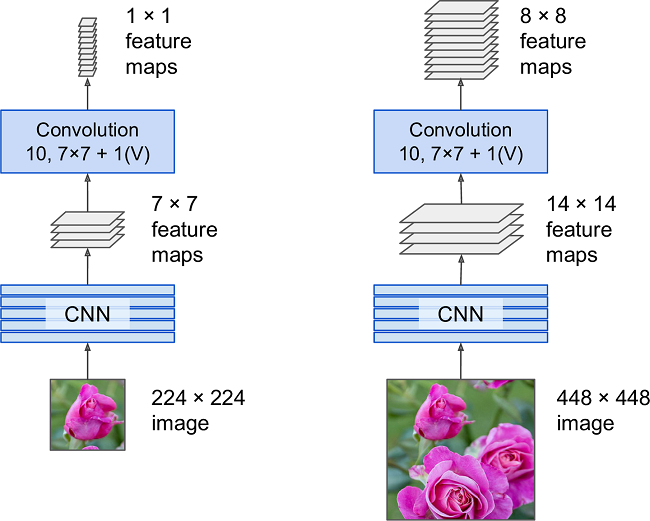
</p>
Figure 14-25. The same fully convolutional network processing a small image (left) and a large one (right)

## You Only Look Once (YOLO)

YOLO is an extremely fast and accurate object detection architecture proposed by Joseph Redmon et al. in a [2015 paper](https://arxiv.org/abs/1506.02640), and subsequently improved [in 2016](https://arxiv.org/abs/1612.08242) (YOLOv2) and [in 2018](https://arxiv.org/abs/1804.02767) (YOLOv3). It is so fast that it can run in real time on a video, as seen in Redmon’s [demo](https://www.youtube.com/watch?v=MPU2HistivI)

YOLOv3’s architecture is quite similar to the one we just discussed, but with a few important differences:

* It outputs **five bounding boxes for each grid cell** (instead of just one), and **each bounding box** comes with an **objectness score.** It also outputs **20 class probabilities** per grid cell, as it was trained on the **PASCAL VOC dataset,** which contains 20 classes. That’s a total of **45 numbers per grid cell:** 5 bounding boxes, each with 4 coordinates, plus 5 objectness scores, plus 20 class probabilities

* Instead of predicting the absolute coordinates of the bounding box centers, YOLOv3 **predicts an offset relative to the coordinates of the grid cell,** where **(0, 0)** means the **top left** of that cell and **(1, 1)** means the** bottom right.** For each grid cell, YOLOv3 is trained to **predict only bounding boxes whose center lies in that cell** (but the bounding box itself generally extends well beyond the grid cell). YOLOv3 applies the **logistic** activation function to the **bounding box coordinates** to ensure they remain in the **0 to 1 range**

* **Before training** the neural net, YOLOv3 finds five representative bounding box dimensions, called **anchor boxes** (or bounding box priors). It does this by applying the **K-Means** algorithm to the **height** and wi**d**th of the **training set bounding boxes** 

* For example, if the training images contain many pedestrians, then one of the anchor boxes will likely have the dimensions of a typical pedestrian. Then when the neural net predicts five bounding boxes per grid cell, it actually **predicts how much to rescale each of the anchor boxes.** For example, suppose one anchor box is 100 pixels tall and 50 pixels wide, and the network predicts, say, a vertical rescaling factor of 1.5 and a horizontal rescaling of 0.9 (for one of the grid cells). This will result in a predicted bounding box of size 150 x 45 pixels. To be more precise, **for each grid cell and each anchor box, the network predicts the log of the vertical and horizontal rescaling factors.** Having these priors makes the network more likely to predict bounding boxes of the **appropriate dimensions,** and it also **speeds up** training because it will more quickly learn what reasonable bounding boxes look like

* The network is trained using images of different scales: **every few batches during training, the network randomly chooses a new image dimension** (from 330 x 330 to 608 x 608 pixels). This allows the network to **learn to detect objects at different scales.** Moreover, it makes it possible to use YOLOv3 at different scales: the smaller scale will be less accurate but faster than the larger scale, so you can choose the right trade-off for your use case

In the 2016 paper, the authors introduce the **YOLO9000** model that uses **hierarchical classification:** the model predicts a probability for each node in a visual hierarchy called WordTree. This makes it possible for the network to predict with high confidence that an image represents, say, a dog, even though it is unsure what specific type of dog

Several YOLO implementations built using TensorFlow are available on GitHub. In particular, check out [Zihao Zang’s TensorFlow 2 implementation](https://github.com/zzh8829/yolov3-tf2)

Other object detection models are available in the TensorFlow Models project, many with pretrained weights; and some have even been ported to TF Hub, such as [**SSD**](https://arxiv.org/abs/1512.02325) and [**Faster-RCNN**](https://arxiv.org/abs/1506.01497), which are both quite popular. SSD is also a “single shot” detection model, similar to YOLO. Faster R-CNN is more complex: the image first goes through a CNN, then the output is passed to a Region Proposal Network (RPN) that proposes bounding boxes that are most likely to contain an object, and a classifier is run for each bounding box, based on the cropped output of the CNN



## Mean Average Precision (MAP)

A very common **metric** used in object detection tasks is the mean Average Precision (mAP). To understand this metric, let’s go back to two classification metrics we discussed in Chapter 3: precision and recall. Remember the **trade-off: the higher the recall, the lower the precision**

You can visualize this in a precision/recall curve (see Figure 3-5). To summarize this curve into a single number, we could compute its area under the curve (AUC). But note that the precision/recall curve may contain a few sections where precision actually goes up when recall increases, especially at low recall values (you can see this at the top left of Figure 3-5). This is one of the motivations for the mAP metric

Suppose the classifier has 90% precision at 10% recall, but 96% precision at 20% recall. There’s really no trade-off here: it simply makes more sense to use the classifier at 20% recall rather than at 10% recall, as you will get both higher recall and higher precision. So instead of looking at the precision at 10% recall, we should really be looking at the maximum precision that the classifier can offer with at least 10% recall. It would be 96%, not 90%

Therefore, one way to get a fair idea of the model’s performance is to **compute the maximum precision you can get with at least 0% recall, then 10% recall, 20%, and so on up to 100%,** and then calculate the **mean of these maximum precisions.** This is called the **Average Precision (AP)** metric. Now when there are **more than two classes, we can compute the AP for each class, and then compute the mean AP (mAP)**

In an object detection system, there is an additional level of complexity: what if the system detected the **correct class, but at the wrong location** (i.e., the bounding box is completely off)? Surely we should not count this as a positive prediction. One approach is to **define an IOU threshold:** for example, we may consider that a prediction is correct only if the IOU is greater than, say, 0.5, and the predicted class is correct

The corresponding mAP is generally noted mAP@0.5 (or mAP@50%, or sometimes just $AP_{50}$. In some competitions (such as the PASCAL VOC challenge), this is what is done. In others (such as the COCO competition), the mAP is computed for different IOU thresholds (0.50, 0.55, 0.60, …, 0.95), and the final metric is the mean of all these mAPs (noted AP@[.50:.95] or AP@[.50:0.05:.95])


# Semantic Segmentation

In semantic segmentation, **each pixel is classified** according to the class of the object it belongs to (e.g., road, car, pedestrian, building, etc.), as shown in Figure 14-26. Note that **different objects of the same class are not distinguished**

For example, all the bicycles on the right side of the segmented image end up as one big lump of pixels. The main **difficulty** in this task is that **when images go through a regular CNN, they gradually lose their spatial resolution** (due to the layers with **strides greater than 1)**; so, a regular CNN may end up knowing that there’s a person somewhere in the bottom left of the image, but it will not be much more precise than that

Just like for object detection, there are many different approaches to tackle this problem, some quite complex. However, a fairly simple solution was proposed in the 2015 paper by Jonathan Long et al. we discussed earlier. The authors start by taking a pretrained **CNN** and **turning it into an FCN.** The CNN applies an overall **stride of 32** to the input image (i.e., if you add up all the strides greater than 1), meaning the last layer outputs feature maps that are **32 times smaller** than the input image. This is clearly too coarse, so they add a single **upsampling layer** that **multiplies the resolution by 32**

<p align='center'>
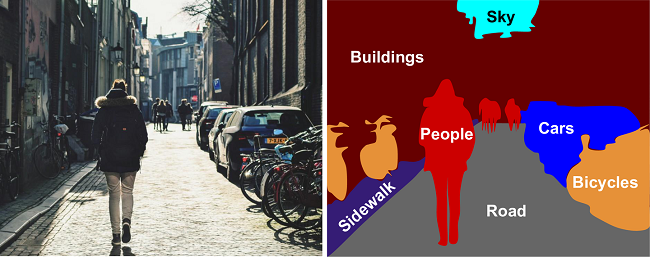
</p>
Figure 14-26. Semantic segmentation

There are several solutions available for upsampling (increasing the size of an image), such as **bilinear interpolation,** but that only works reasonably well up to x4 or x8

Instead, they use a **transposed convolutional layer:** it is equivalent to **first stretching the image by inserting empty rows and columns** (full of zeros), **then performing a regular convolution** (see Figure 14-27)

Alternatively, some people prefer to think of it as a regular convolutional layer that uses **fractional strides** (e.g., 1/2 in Figure 14-27). The transposed convolutional layer can be initialized to perform something close to **linear interpolation,** but since it is a trainable layer, it will learn to do better during training. In tf.keras, you can use the layer Conv2DTranspose

<p align='center'>
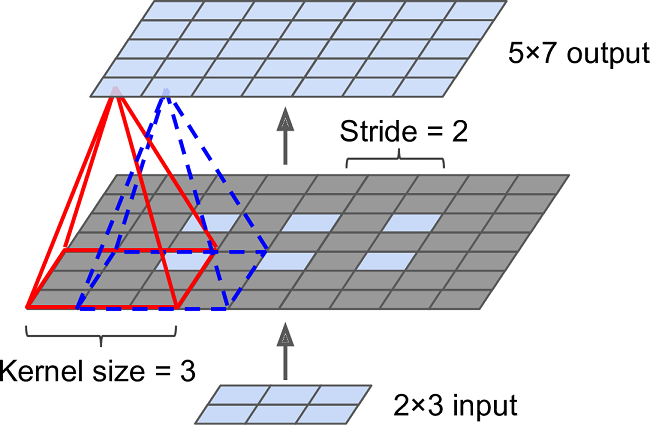
</p>
Figure 14-27. Upsampling using a transposed convolutional layer

In a transposed convolutional layer, the **stride defines how much the input will be stretched,** not the size of the filter steps, so the **larger the stride, the larger the output** (unlike for convolutional layers or pooling layers)